In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Constants

h_bar = 1.0
A_hfs = 4463.302  # (Muonium Hyperfine splitting)
# gamma = g * mu_B / h
gamma_e = 28024.21
gamma_mu = 135.54 # Muon, much heavier -> smaller magnetic moment

In [3]:
# Since we are dealing with spin systems, we need to define the Pauli Sigma matrices t

sigma_0 = np.eye(2)
sigma_x = np.array([[0, 1],  [1, 0]])
sigma_y = np.array([[0, -1j],[1j, 0]])
sigma_z = np.array([[1, 0],  [0, -1]])

# Here, we create a tensor product space in which we will define our Hamiltonian
Sx = 0.5 * np.kron(sigma_x, sigma_0)
Sy = 0.5 * np.kron(sigma_y, sigma_0)
Sz = 0.5 * np.kron(sigma_z, sigma_0)

Ix = 0.5 * np.kron(sigma_0, sigma_x)
Iy = 0.5 * np.kron(sigma_0, sigma_y)
Iz = 0.5 * np.kron(sigma_0, sigma_z)

S_dot_I = np.dot(Sx, Ix) + np.dot(Sy, Iy) + np.dot(Sz, Iz) # useful for future calculations


$$
H =H_{hyperfine} + H_{zeeman}= A_{hfs} \mathbf{S}_\mu \cdot \mathbf{S}_e -( \mu_\mu \mathbf{S}_\mu + \mu_e \mathbf{S}_e) \cdot \mathbf{B}
$$


In [4]:
def Hamiltonian(B_values):
    
    H_hfs = A_hfs * S_dot_I
    
    H_zeeman = B_values * (gamma_e * Sz - gamma_mu * Iz)
    
    return H_hfs + H_zeeman

In [5]:
B_values = np.linspace(0,2,200)
eigenvalues=[]

for B in B_values:
    
    H = Hamiltonian(B)
    
    evals, evecs = np.linalg.eigh(H)
    
    eigenvalues.append(evals)
    
eigenvalues = np.array(eigenvalues)

E = np.array(eigenvalues)

print(eigenvalues[0])
print(f"HFS Splitting: {eigenvalues[0,3]-eigenvalues[0,0]}")
print(eigenvalues[-1])
    

[-3347.4765  1115.8255  1115.8255  1115.8255]
HFS Splitting: 4463.302
[-29363.86589661 -26772.8445      27132.21489661  29004.4955    ]


In [6]:
nu_12 = E[:, 1] - E[:, 0]  # Low frequency transition
nu_23 = E[:, 2] - E[:, 1]  # Hyperfine transition 
nu_34 = E[:, 3] - E[:, 2] 
nu_14 = E[:, 4-1] - E[:, 0] # High energy hyperfine splitting

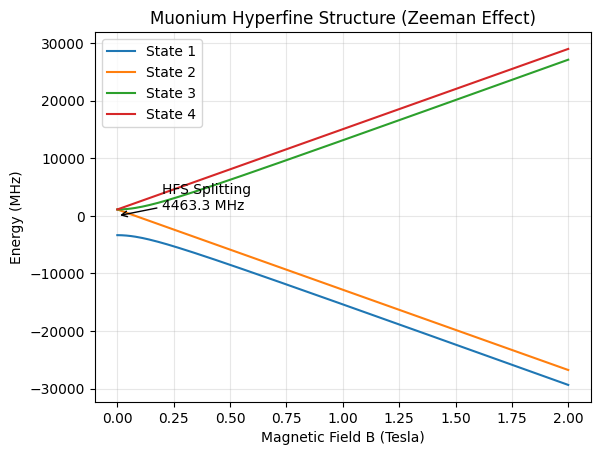

In [7]:
labels = [r'$|1\rangle$', r'$|2\rangle$', r'$|3\rangle$', r'$|4\rangle$']

for i in range(4):
    plt.plot(B_values, eigenvalues[:, i], label=f'State {i+1}')
    
plt.title("Muonium Hyperfine Structure (Zeeman Effect)")
plt.xlabel("Magnetic Field B (Tesla)")
plt.ylabel("Energy (MHz)")
plt.annotate(f'HFS Splitting\n{eigenvalues[0, 3] - eigenvalues[0, 0]:.1f} MHz', 
            xy=(0, 0), xytext=(0.2, 1000),
            arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()



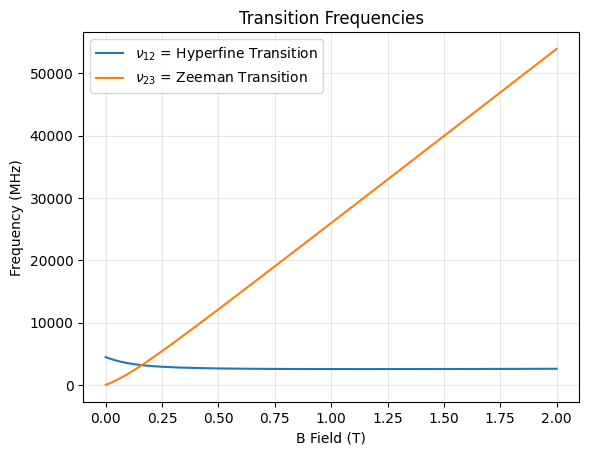

In [8]:
nu_12 = eigenvalues[:, 1] - eigenvalues[:, 0]  # Transition within lower triplet
nu_23 = eigenvalues[:, 2] - eigenvalues[:, 1]  # Hyperfine transition (approx)

plt.figure()
plt.plot(B_values, nu_12, label=r'$\nu_{12}$ = Hyperfine Transition')
plt.plot(B_values, nu_23, label=r'$\nu_{23}$ = Zeeman Transition')
plt.title("Transition Frequencies")
plt.xlabel("B Field (T)")
plt.grid(True, alpha=0.3)
plt.ylabel("Frequency (MHz)")
plt.legend()
plt.show()

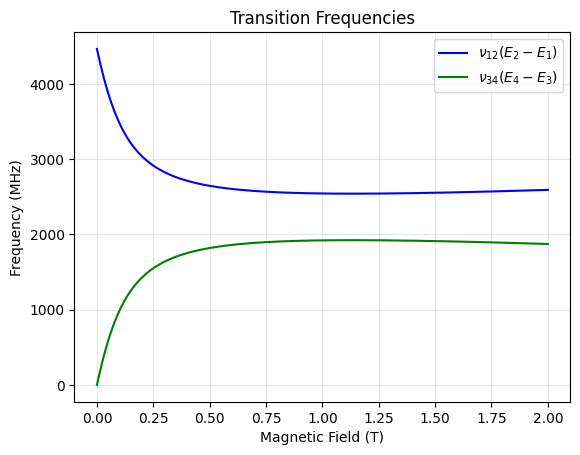

In [9]:
# The Transition Frequencies
plt.plot(B_values, nu_12, label=r'$\nu_{12} (E_2 - E_1)$', color='blue')
plt.plot(B_values, nu_34, label=r'$\nu_{34} (E_4 - E_3)$', color='green')
plt.title("Transition Frequencies")
plt.xlabel("Magnetic Field (T)")
plt.ylabel("Frequency (MHz)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()